In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import datetime
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [2]:
# membaca file dan ubah tanggal menjadi time series
df = pd.read_csv("Kalimantan Utara.csv")
df['Tanggal'] = pd.to_datetime(df.Tanggal)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354 entries, 0 to 353
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Tanggal  354 non-null    datetime64[ns]
 1   Tn       348 non-null    float64       
 2   Tx       336 non-null    float64       
 3   Tavg     327 non-null    float64       
 4   RH_avg   327 non-null    float64       
 5   RR       346 non-null    float64       
 6   ss       332 non-null    float64       
 7   ff_x     348 non-null    float64       
 8   ddd_x    348 non-null    float64       
 9   ff_avg   348 non-null    float64       
 10  ddd_car  348 non-null    object        
dtypes: datetime64[ns](1), float64(9), object(1)
memory usage: 30.5+ KB


C:\Users\rivan\AppData\Local\Temp\ipykernel_2208\3480317908.py:3: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df['Tanggal'] = pd.to_datetime(df.Tanggal)


In [3]:
#ambil data tanggal, tn (temperatur minimum), tx(temperatur maksimum), RR(curah hujan), Tavg(tempeartur rata rata)
df1 = df[["Tanggal", "Tn","Tx","RR", "Tavg"]]
df1

,Tanggal,Tn,Tx,RR,Tavg
0,2023-01-01,24.2,33.8,0.0,28.2
1,2023-02-01,25.4,32.8,0.0,28.3
2,2023-03-01,25.5,30.8,0.0,27.8
3,2023-04-01,23.4,NaN,75.0,26.4
4,2023-05-01,24.0,33.0,3.4,NaN
...,...,...,...,...,...
349,2023-12-16,25.4,33.0,0.0,28.7
350,2023-12-17,25.2,33.2,9.0,28.9
351,2023-12-18,25.7,33.0,2.6,28.7
352,2023-12-19,24.9,NaN,29.5,28.2


In [4]:
# cek duplikat
df1.duplicated('Tanggal', keep=False).sum()

0

In [5]:
# hapus duplikat
df1 = df1.drop_duplicates('Tanggal', keep='first').reset_index()
df1.duplicated().sum()

0

In [6]:
# ganti kode 8888 menjadi 0.0
df1 = df1.replace(8888, 0.0)
df1.loc[df1['RR']==8888].count()

index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

In [7]:
# sort berdasarkan tanggal
df1 = df1.sort_values(by=["Tanggal"]).reset_index()
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg
0,0,0,2023-01-01,24.2,33.8,0.0,28.2
1,31,31,2023-01-02,23.4,29.2,30.2,26.0
2,59,59,2023-01-03,25.0,32.6,0.0,27.4
3,90,90,2023-01-04,24.0,31.3,33.3,27.0
4,120,120,2023-01-05,25.3,31.4,3.0,28.2
...,...,...,...,...,...,...,...
349,349,349,2023-12-16,25.4,33.0,0.0,28.7
350,350,350,2023-12-17,25.2,33.2,9.0,28.9
351,351,351,2023-12-18,25.7,33.0,2.6,28.7
352,352,352,2023-12-19,24.9,NaN,29.5,28.2


In [8]:
#cek null
df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          6
Tx         18
RR          8
Tavg       27
dtype: int64

In [9]:
# isi yang null
mrr = df1['RR'].mean()
tnn = df1['Tn'].mean()
txx = df1['Tx'].mean()
mav = (df1['Tn'] + df1['Tx'])/2

df1['RR'] = df1['RR'].fillna(mrr)
df1['Tn'] = df1['Tn'].fillna(tnn)
df1['Tx'] = df1['Tx'].fillna(txx)
df1['Tavg'] = df1['Tavg'].fillna(mav)

df1.isnull().sum()

level_0     0
index       0
Tanggal     0
Tn          0
Tx          0
RR          0
Tavg       12
dtype: int64

In [10]:
ma = df1['Tavg'].mean()
df1['Tavg'] = df1['Tavg'].fillna(ma)
df1.isnull().sum()

level_0    0
index      0
Tanggal    0
Tn         0
Tx         0
RR         0
Tavg       0
dtype: int64

<Axes: >

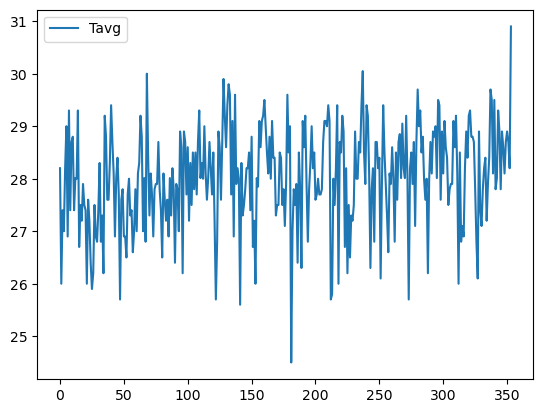

In [11]:
#plotting tavg
df1[['Tavg']].plot()

<Axes: >

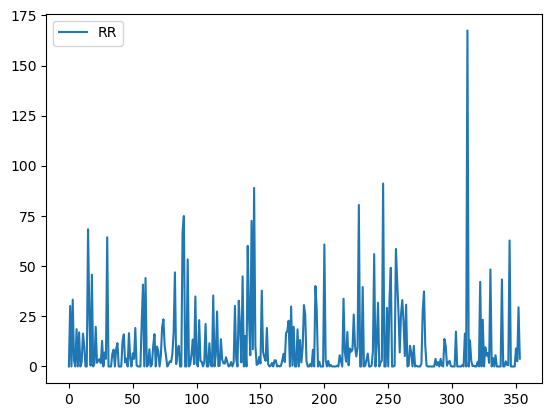

In [12]:
#plotting tavg
df1[['RR']].plot()

In [13]:
#shifting tx, tavg, dan rr
df1['ptx'] = df1.shift(-1)["Tx"]
df1['pta'] = df1.shift(-1)["Tavg"]
df1['ptr'] = df1.shift(-1)["RR"]
df1

,level_0,index,Tanggal,Tn,Tx,RR,Tavg,ptx,pta,ptr
0,0,0,2023-01-01,24.2,33.800000,0.0,28.2,29.200000,26.0,30.2
1,31,31,2023-01-02,23.4,29.200000,30.2,26.0,32.600000,27.4,0.0
2,59,59,2023-01-03,25.0,32.600000,0.0,27.4,31.300000,27.0,33.3
3,90,90,2023-01-04,24.0,31.300000,33.3,27.0,31.400000,28.2,3.0
4,120,120,2023-01-05,25.3,31.400000,3.0,28.2,33.000000,29.0,0.0
...,...,...,...,...,...,...,...,...,...,...
349,349,349,2023-12-16,25.4,33.000000,0.0,28.7,33.200000,28.9,9.0
350,350,350,2023-12-17,25.2,33.200000,9.0,28.9,33.000000,28.7,2.6
351,351,351,2023-12-18,25.7,33.000000,2.6,28.7,32.079167,28.2,29.5
352,352,352,2023-12-19,24.9,32.079167,29.5,28.2,33.100000,30.9,3.9


In [14]:
# ambil data RR, tavg, pta, ptr
df1 = df1[['RR', 'Tavg', 'pta', 'ptr']]
df1

,RR,Tavg,pta,ptr
0,0.0,28.2,26.0,30.2
1,30.2,26.0,27.4,0.0
2,0.0,27.4,27.0,33.3
3,33.3,27.0,28.2,3.0
4,3.0,28.2,29.0,0.0
...,...,...,...,...
349,0.0,28.7,28.9,9.0
350,9.0,28.9,28.7,2.6
351,2.6,28.7,28.2,29.5
352,29.5,28.2,30.9,3.9


In [15]:
#hapus yang kosong
df1 = df1.iloc[:-1, :].copy()
df1

,RR,Tavg,pta,ptr
0,0.0,28.2,26.0,30.2
1,30.2,26.0,27.4,0.0
2,0.0,27.4,27.0,33.3
3,33.3,27.0,28.2,3.0
4,3.0,28.2,29.0,0.0
...,...,...,...,...
348,0.0,28.1,28.7,0.0
349,0.0,28.7,28.9,9.0
350,9.0,28.9,28.7,2.6
351,2.6,28.7,28.2,29.5


In [16]:
#import library
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [17]:
#buat indeks
df1['Indeks'] = df1.reset_index().index
df1

,RR,Tavg,pta,ptr,Indeks
0,0.0,28.2,26.0,30.2,0
1,30.2,26.0,27.4,0.0,1
2,0.0,27.4,27.0,33.3,2
3,33.3,27.0,28.2,3.0,3
4,3.0,28.2,29.0,0.0,4
...,...,...,...,...,...
348,0.0,28.1,28.7,0.0,348
349,0.0,28.7,28.9,9.0,349
350,9.0,28.9,28.7,2.6,350
351,2.6,28.7,28.2,29.5,351


In [18]:
#data training dan testing
X = df1[["Indeks", "Tavg"]]
y = df1["pta"]

In [19]:
#data spliting
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size = 0.2, random_state=0, shuffle = False)


In [20]:
#data fitting
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [21]:
X_test

,Indeks,Tavg
282,282,29.3
283,283,28.5
284,284,28.8
285,285,28.0
286,286,27.6
...,...,...
348,348,28.1
349,349,28.7
350,350,28.9
351,351,28.7


In [22]:
#testing
pred1 = lr.predict(X_test)
pred1

array([28.4555925 , 28.31105687, 28.36785499, 28.22331936, 28.15199601,
       28.22709719, 27.89953089, 28.23087502, 28.36088541, 28.25295591,
       28.40126937, 28.38485522, 28.42335027, 28.24445625, 28.51864343,
       28.50222928, 28.17466297, 28.41449177, 28.26995614, 28.45487573,
       28.36524931, 28.33053209, 28.16769339, 28.22449151, 28.24468349,
       28.2465724 , 28.46809813, 28.37847171, 28.49017903, 28.2907342 ,
       27.90825869, 28.36772429, 28.05846106, 28.11525918, 28.08054195,
       28.32037075, 28.45038114, 28.36075471, 28.50906817, 28.52926015,
       28.43963372, 28.44152264, 28.42510848, 28.26226979, 28.08112803,
       27.95489547, 28.46927028, 28.19661318, 28.14359289, 28.27360327,
       28.34870446, 28.38719951, 28.16945161, 28.299462  , 28.39286625,
       28.63269504, 28.59797782, 28.34362379, 28.60175565, 28.29249242,
       28.33323521, 28.57081626, 28.4994929 , 28.30004807, 28.50327073,
       28.45025044, 28.36062402, 28.47233134, 28.51082639, 28.47

In [23]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
mae = mean_absolute_error(y_test, pred1)
mse = mean_squared_error(y_test, pred1)
print(mae, mse)

0.655728214972684 0.7138035183295873


In [24]:
X_test['Indeks'] = X_test.index
X_test

,Indeks,Tavg
282,282,29.3
283,283,28.5
284,284,28.8
285,285,28.0
286,286,27.6
...,...,...
348,348,28.1
349,349,28.7
350,350,28.9
351,351,28.7


In [25]:
predd = pd.DataFrame(pred1).set_index(X_test['Indeks'])
predd

,0
Indeks,
282,28.455592
283,28.311057
284,28.367855
285,28.223319
286,28.151996
...,...
348,28.360624
349,28.472331
350,28.510826


In [26]:
kan = pd.concat([df1['Tavg'], predd], axis=1)
kan.sort_index(False).head(1000)

C:\Users\rivan\AppData\Local\Temp\ipykernel_2208\2636922572.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only.
  kan.sort_index(False).head(1000)


,Tavg,0
0,28.2,NaN
1,26.0,NaN
2,27.4,NaN
3,27.0,NaN
4,28.2,NaN
...,...,...
348,28.1,28.360624
349,28.7,28.472331
350,28.9,28.510826
351,28.7,28.476109


<Axes: >

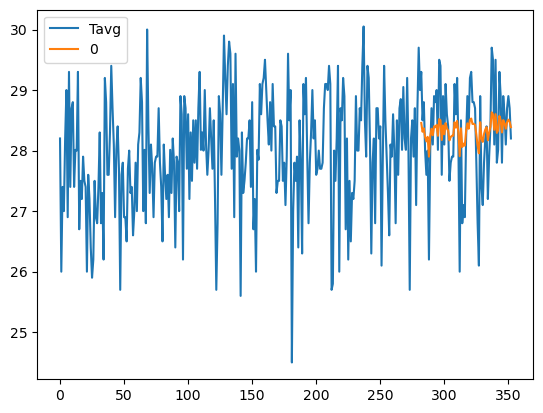

In [27]:
kan.plot()

In [30]:
new_data = [[354, 28.2],[355, 28.2],[356, 28.2],[357, 28.2],[358, 28.2],[359, 28.2],[360, 28.2]]
lr.predict(new_data)

C:\Users\rivan\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([28.39026057, 28.39214948, 28.3940384 , 28.39592731, 28.39781623,
       28.39970514, 28.40159405])

In [31]:
kan.to_json('Prediksi Kalimantan Utara.json')